<a href="https://colab.research.google.com/github/rana6-12/Machine-Learning-NTI/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [3]:
data = pd.read_excel("/content/car_data.xlsx")

In [4]:
print("Head of dataset:")
print(data.head())
print("\nInfo:")
print(data.info())

Head of dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3 

In [5]:
print("\nNull values per column:")
print(data.isnull().sum())


Null values per column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [6]:
print("\nDescribe:")
print(data.describe())


Describe:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [7]:
print("\nColumns:")
print(data.columns.tolist())


Columns:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [9]:
if 'Fuel_Type' in data.columns:
    print("\nFuel_Type counts:")
    print(data['Fuel_Type'].value_counts())
if 'Seller_Type' in data.columns:
    print("\nSeller_Type counts:")
    print(data['Seller_Type'].value_counts())
if 'Transmission' in data.columns:
    print("\nTransmission counts:")
    print(data['Transmission'].value_counts())


Fuel_Type counts:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Seller_Type counts:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission counts:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [10]:
fuel_type = data['Fuel_Type'] if 'Fuel_Type' in data.columns else None
seller_type = data['Seller_Type'] if 'Seller_Type' in data.columns else None
transmission_type = data['Transmission'] if 'Transmission' in data.columns else None
selling_price = data['Selling_Price'] if 'Selling_Price' in data.columns else None


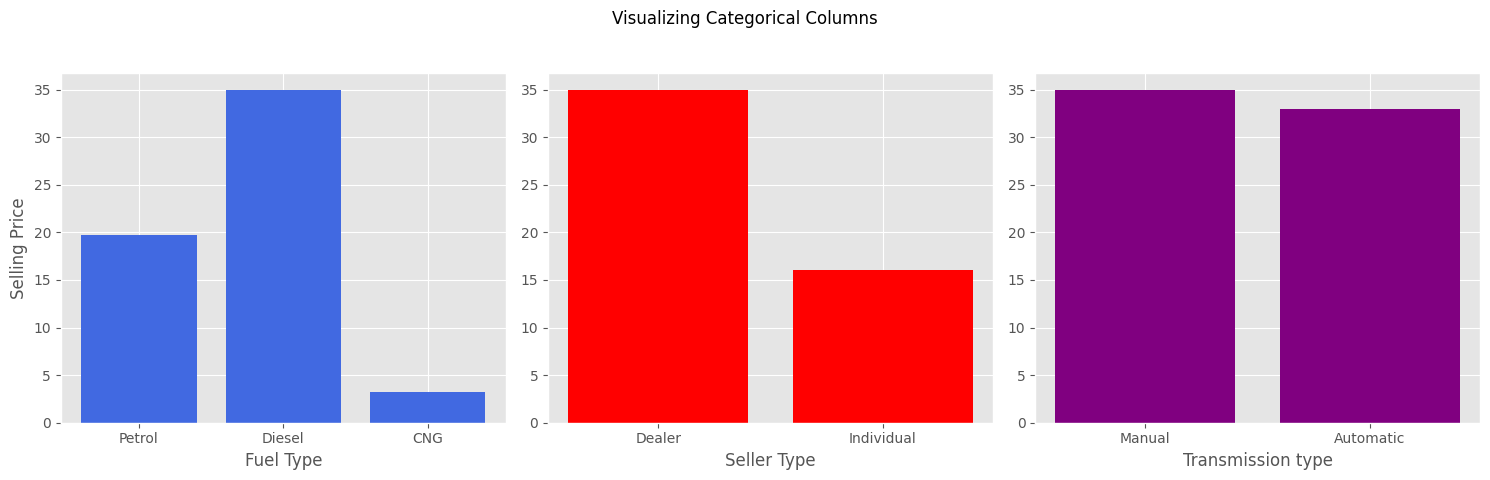

In [11]:
style.use('ggplot')
if fuel_type is not None and selling_price is not None:
    fig = plt.figure(figsize=(15,5))
    fig.suptitle('Visualizing Categorical Columns')
    plt.subplot(1,3,1)
    plt.bar(fuel_type, selling_price, color='royalblue')
    plt.xlabel("Fuel Type")
    plt.ylabel("Selling Price")
    if seller_type is not None:
        plt.subplot(1,3,2)
        plt.bar(seller_type, selling_price, color='red')
        plt.xlabel("Seller Type")
    if transmission_type is not None:
        plt.subplot(1,3,3)
        plt.bar(transmission_type, selling_price, color='purple')
        plt.xlabel('Transmission type')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

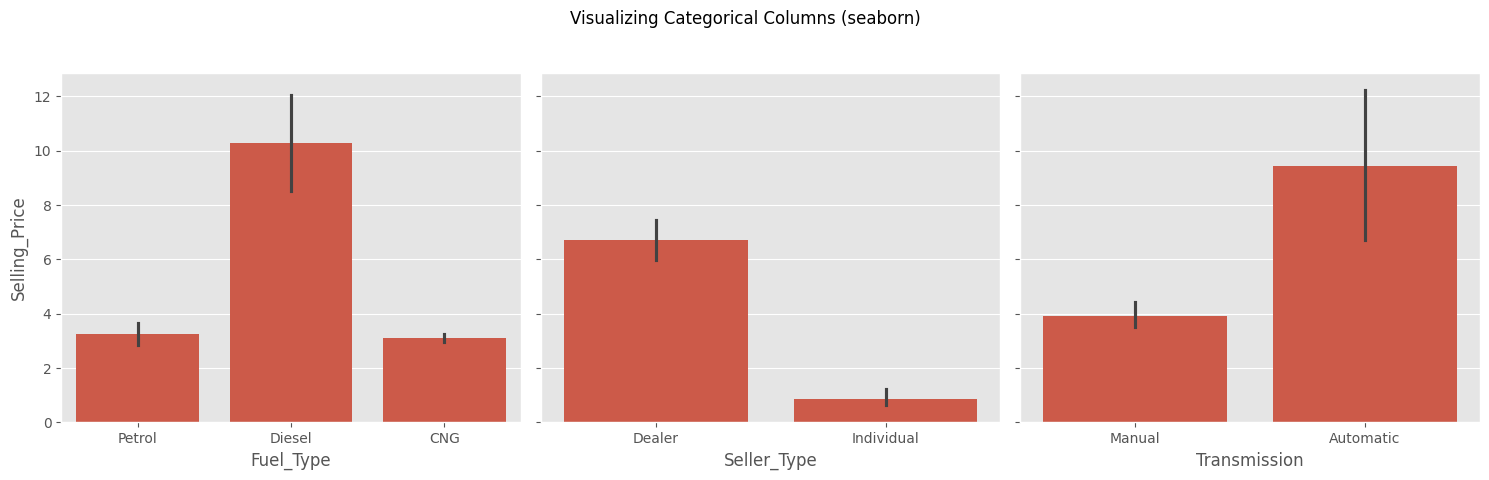

In [12]:
if fuel_type is not None and selling_price is not None:
    fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
    fig.suptitle('Visualizing Categorical Columns (seaborn)')
    sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
    if seller_type is not None:
        sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
    if transmission_type is not None:
        sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [13]:
if 'Fuel_Type' in data.columns and 'Petrol' in data['Fuel_Type'].unique():
    petrol_data = data.groupby('Fuel_Type').get_group('Petrol')
    print("\nPetrol data description:")
    print(petrol_data.describe())

if 'Seller_Type' in data.columns and 'Dealer' in data['Seller_Type'].unique():
    seller_data = data.groupby('Seller_Type').get_group('Dealer')
    print("\nDealer data description:")
    print(seller_data.describe())


Petrol data description:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   239.000000     239.000000     239.000000     239.000000  239.000000
mean   2013.539749       3.264184       5.583556   33528.937238    0.050209
std       3.042674       3.135537       5.290685   40308.984886    0.270368
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.600000       0.940000   13850.000000    0.000000
50%    2014.000000       2.650000       4.600000   25870.000000    0.000000
75%    2016.000000       5.200000       7.980000   44271.000000    0.000000
max    2017.000000      19.750000      23.730000  500000.000000    3.000000

Dealer data description:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   195.000000     195.000000     195.000000     195.000000  195.000000
mean   2013.712821       6.721692      10.886308   39850.133333    0.020513
std       2.686275       5.136088   

In [14]:
replace_map = {}
if 'Fuel_Type' in data.columns:
    replace_map['Fuel_Type'] = {'Petrol':0, 'Diesel':1, 'CNG':2}
if 'Seller_Type' in data.columns:
    replace_map['Seller_Type'] = {'Dealer':0, 'Individual':1}
if 'Transmission' in data.columns:
    replace_map['Transmission'] = {'Manual':0, 'Automatic':1}

if replace_map:
    data.replace(replace_map, inplace=True)

print("\nAfter encoding (head):")
print(data.head())


After encoding (head):
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


/tmp/ipython-input-614115474.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(replace_map, inplace=True)


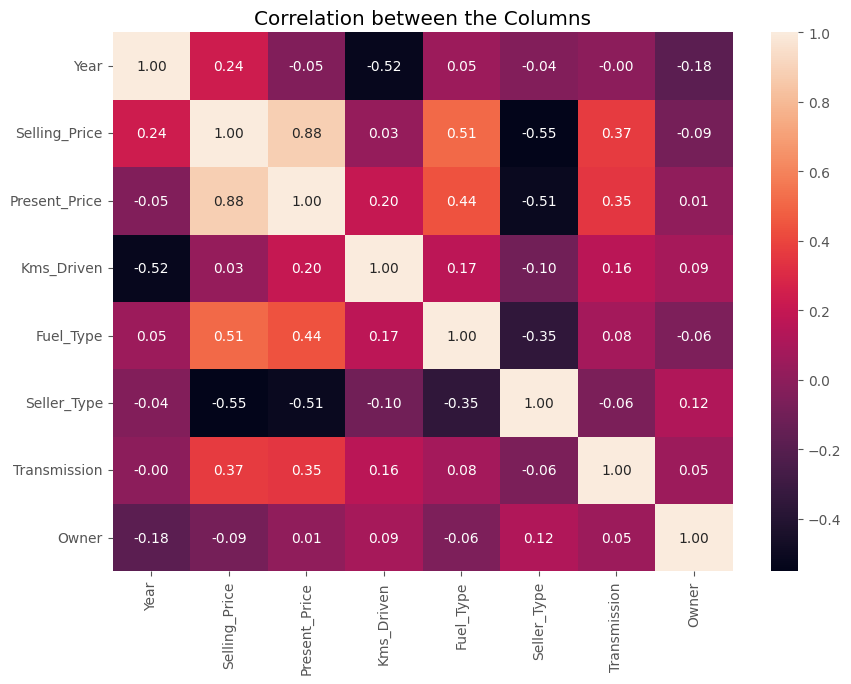

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(data.drop('Car_Name', axis=1).corr(), annot=True, fmt=".2f")
plt.title('Correlation between the Columns')
plt.show()

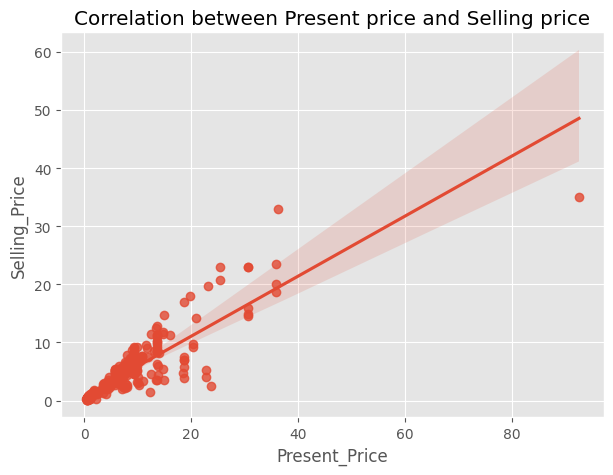

In [17]:
if 'Present_Price' in data.columns and 'Selling_Price' in data.columns:
    fig=plt.figure(figsize=(7,5))
    plt.title('Correlation between Present price and Selling price')
    sns.regplot(x='Present_Price', y='Selling_Price', data=data)
    plt.show()

In [18]:
if 'Selling_Price' not in data.columns:
    raise ValueError("Dataset must contain 'Selling_Price' column.")
X = data.drop(['Car_Name','Selling_Price'], axis=1) if 'Car_Name' in data.columns else data.drop(['Selling_Price'], axis=1)
y = data["Selling_Price"]

print("\nX shape:", X.shape)
print("y shape:", y.shape)


X shape: (301, 7)
y shape: (301,)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = linreg.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\nPerformance on test set:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))


Performance on test set:
MAE: 1.4308902766497633
MSE: 5.167492869813309
R2 score: 0.8385549491623852


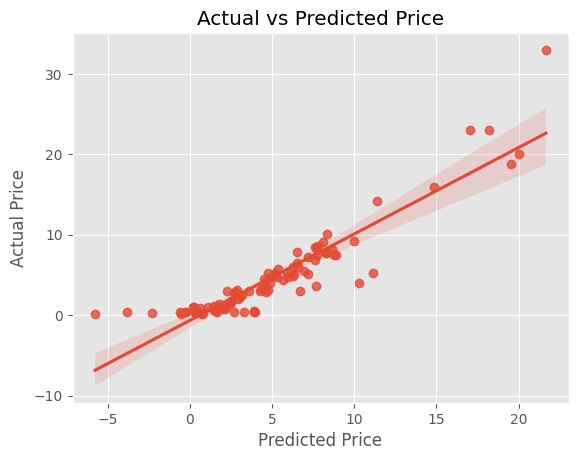

In [25]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()

In [26]:
try:
    import joblib
    joblib.dump(linreg, "linreg_car_price_model.joblib")
    joblib.dump(scaler, "scaler_car_price.joblib")
    print("\nSaved model to linreg_car_price_model.joblib and scaler_car_price.joblib")
except Exception as e:
    print("\nCould not save model/scaler (joblib may not be installed):", e)


Saved model to linreg_car_price_model.joblib and scaler_car_price.joblib
